# Analyze and plot DNA extraction yields
**Zach Flinkstrom**\
\
*This notebook looks at the differences in DNA extraction yields from the Lake Washington wetland soil cores from different seasons and depths*

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

/mnt/c/Users/Zach_Flinkstrom/Documents/ubuntu/.conda/envs/wetland_study/lib/python3.12/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Import data

In [2]:
# Import data
df = pd.read_excel('data/DNA_extraction_yield.xlsx')
df['Depth_cm'] = df['Section'].map({'Top':10, 'Mid':30, 'Btm':50})
df['Section'] = df['Section'].map({'Top':'Top (0-20cm)', 'Mid':'Mid (20-40cm)', 'Btm':'Btm (40-60cm)'})
df

,Sample_Number,Season,Core,Section,Rep,Qubit_conc_ng/uL,Elution_vol_uL,Soil_mass_mg,DNA_ng/mg-soil,Depth_cm
0,1,May,1,Top (0-20cm),1,112.0,75,250,33.60,10
1,2,May,1,Top (0-20cm),2,106.0,75,250,31.80,10
2,3,May,1,Mid (20-40cm),1,85.4,75,250,25.62,30
3,4,May,1,Mid (20-40cm),2,108.0,75,250,32.40,30
4,5,May,1,Btm (40-60cm),1,64.0,75,250,19.20,50
...,...,...,...,...,...,...,...,...,...,...
73,14,Aug.,3,Top (0-20cm),2,118.0,75,250,35.40,10
74,15,Aug.,3,Mid (20-40cm),1,62.6,75,250,18.78,30
75,16,Aug.,3,Mid (20-40cm),2,75.0,75,250,22.50,30
76,17,Aug.,3,Btm (40-60cm),1,52.6,75,250,15.78,50


## Plot

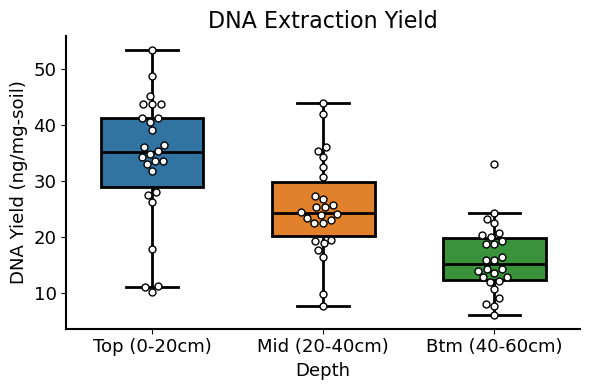

In [3]:
# Plot data by depth
fig, ax = plt.subplots(1,1, figsize=(6, 4))

sns.boxplot(data=df, x='Section', y='DNA_ng/mg-soil', hue='Section', 
            width=.6, fliersize=3, linewidth=2, linecolor='black', ax=ax)
#sns.swarmplot(data=df,  x='Section', y='DNA_ng/mg-soil', hue='Season',  hue_order=['Oct.','Feb.','May','Aug.'],
 #             palette=['tab:red','tab:gray','tab:brown','tab:cyan'], linewidth=1, edgecolor='black', alpha=1., ax=ax)
sns.swarmplot(data=df,  x='Section', y='DNA_ng/mg-soil', 
              color='white', linewidth=1, edgecolor='black', alpha=1., ax=ax)
sns.despine()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_title('DNA Extraction Yield', size=16)
#ax.set_ylabel('DNA Yield (ng mg-soil$^-$$^1$)', size=13)
ax.set_ylabel('DNA Yield (ng/mg-soil)', size=13)
ax.set_xlabel('Depth', size=13)
ax.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig('figures/DNA_extraction_yield.png', dpi=450)
plt.show()

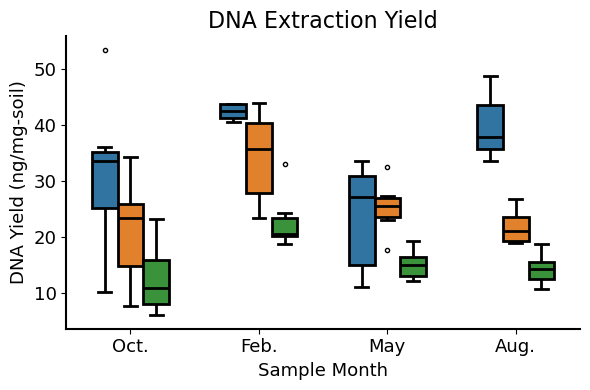

In [4]:
# Plot data by depth and season
fig, ax = plt.subplots(1,1, figsize=(6, 4))

sns.boxplot(data=df, x='Season', y='DNA_ng/mg-soil', hue='Section', order=['Oct.','Feb.','May','Aug.'],
            width=.6, fliersize=3, linewidth=2, linecolor='black', ax=ax, legend=None)

sns.despine()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_title('DNA Extraction Yield', size=16)
#ax.set_ylabel('DNA Yield (ng mg-soil$^-$$^1$)', size=13)
ax.set_ylabel('DNA Yield (ng/mg-soil)', size=13)
ax.set_xlabel('Sample Month', size=13)
ax.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig('figures/DNA_extraction_yield_w_season.png', dpi=450)
plt.show()

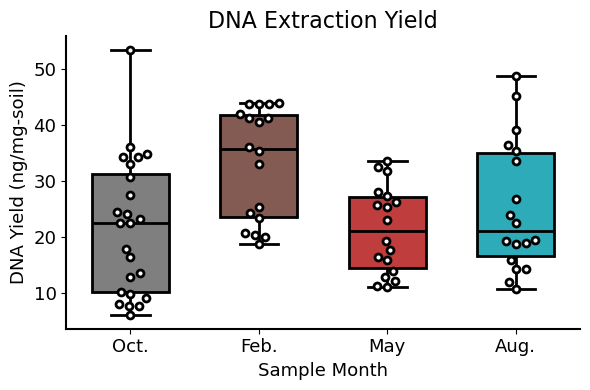

In [5]:
# Plot data by season
fig, ax = plt.subplots(1,1, figsize=(6, 4))

sns.boxplot(data=df, x='Season', y='DNA_ng/mg-soil', hue='Season', order=['Oct.','Feb.','May','Aug.'], palette=['tab:red','tab:gray','tab:brown','tab:cyan'],
            width=.6, fliersize=3, linewidth=2, linecolor='black', ax=ax)
sns.swarmplot(data=df, x='Season', y='DNA_ng/mg-soil', color='white',
             linewidth=2, edgecolor='black', ax=ax)
sns.despine()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_title('DNA Extraction Yield', size=16)
#ax.set_ylabel('DNA Yield (ng mg-soil$^-$$^1$)', size=13)
ax.set_ylabel('DNA Yield (ng/mg-soil)', size=13)
ax.set_xlabel('Sample Month', size=13)
ax.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig('figures/DNA_extraction_yield_just_season.png', dpi=450)
plt.show()

## Statistical analysis

In [6]:
# Spearman correlation with depth
stats.spearmanr(df['DNA_ng/mg-soil'], df['Depth_cm'])

SignificanceResult(statistic=np.float64(-0.6385112470413845), pvalue=np.float64(3.1905410268766146e-10))

In [7]:
# Test for normality
stats.normaltest(df['DNA_ng/mg-soil'])

NormaltestResult(statistic=np.float64(5.444604798003886), pvalue=np.float64(0.06572325892602646))

Fail to reject test for normality at p<0.05 so move forward with parametric ANOVA test

In [8]:
# ANOVA test between seasons
stats.f_oneway(df[df.Season=='Oct.']['DNA_ng/mg-soil'],
               df[df.Season=='Feb.']['DNA_ng/mg-soil'],
               df[df.Season=='May']['DNA_ng/mg-soil'],
               df[df.Season=='Aug.']['DNA_ng/mg-soil'])

F_onewayResult(statistic=np.float64(5.02933608691567), pvalue=np.float64(0.0031573751558317056))

In [9]:
# Post-hoc Tukey HSD test for seasonal comparison
tukey = stats.tukey_hsd(df[df.Season=='Oct.']['DNA_ng/mg-soil'],
               df[df.Season=='Feb.']['DNA_ng/mg-soil'],
               df[df.Season=='May']['DNA_ng/mg-soil'],
               df[df.Season=='Aug.']['DNA_ng/mg-soil'])
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -11.532     0.005   -20.282    -2.782
 (0 - 2)      0.335     1.000    -8.415     9.084
 (0 - 3)     -3.639     0.695   -12.389     5.111
 (1 - 0)     11.532     0.005     2.782    20.282
 (1 - 2)     11.867     0.007     2.513    21.221
 (1 - 3)      7.893     0.128    -1.461    17.247
 (2 - 0)     -0.335     1.000    -9.084     8.415
 (2 - 1)    -11.867     0.007   -21.221    -2.513
 (2 - 3)     -3.973     0.681   -13.327     5.381
 (3 - 0)      3.639     0.695    -5.111    12.389
 (3 - 1)     -7.893     0.128   -17.247     1.461
 (3 - 2)      3.973     0.681    -5.381    13.327



**Oct and May yielded significantly less DNA than Feb.**

In [10]:
# ANOVA test for depths
stats.f_oneway(df[df.Depth_cm==10]['DNA_ng/mg-soil'],
               df[df.Depth_cm==30]['DNA_ng/mg-soil'],
               df[df.Depth_cm==50]['DNA_ng/mg-soil'])

F_onewayResult(statistic=np.float64(26.270610080712505), pvalue=np.float64(2.2537259053233003e-09))

In [11]:
# Tukey HSD post-hoc test for different depths
tukey = stats.tukey_hsd(df[df.Depth_cm==10]['DNA_ng/mg-soil'],
               df[df.Depth_cm==30]['DNA_ng/mg-soil'],
               df[df.Depth_cm==50]['DNA_ng/mg-soil'])
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      8.624     0.002     2.706    14.541
 (0 - 2)     17.934     0.000    12.017    23.852
 (1 - 0)     -8.624     0.002   -14.541    -2.706
 (1 - 2)      9.310     0.001     3.393    15.228
 (2 - 0)    -17.934     0.000   -23.852   -12.017
 (2 - 1)     -9.310     0.001   -15.228    -3.393



**All depths have significantly different DNA extraction yields**